## Epoch-wise performance

In [40]:
import matplotlib.pyplot as plt

rc_params = {
    'figure.constrained_layout.use': True,
    'axes.prop_cycle': "cycler('color', ['#FF2C00', '#0C5DA5', '#FF9500','#00B945', '#845B97', '#474747', '#9e9e9e'])",
    'xtick.major.size': 2.0,
    'ytick.major.size': 2.0,
    'xtick.minor.visible': False,
    'xtick.top': False,
    'xtick.bottom': True,
    'ytick.minor.visible': False,
    'ytick.right': False,
    'figure.edgecolor': '#0e1111',
    'axes.grid': True,
    'axes.axisbelow': True,
    'svg.fonttype': 'none',
    'text.usetex': False,
    'font.family': ['sans-serif'],
    'font.size': 16,
    'lines.linewidth': 3,
}
plt.rcParams.update(rc_params)

In [49]:
epoch = [10, 15, 20, 25]
FFT = [81.324, 81.168, 81.03793353, 80.61310348]
WISE = [82.388, 82.526, 82.60025268, 82.29885387]
FLYP = [82.562, 82.52199888, 82.4268213, 82.36674188]
Our = [82.778, 83.196, 83.46, 83.544]

FFT_OOD = [53.7442, 52.2534, 50.53006088, 50.2306975]
WISE_OOD = [58.7742, 60.0294, 57.19067108, 56.92073441]
FLYP_OOD = [59.6544, 58.53082001, 58.57387273, 58.04781816]
Our_OOD = [62.0388, 62.0324, 61.8194, 61.3622]

FFT_V2 = [70.66, 70.47, 70.42904903, 69.93415409]
WISE_V2 = [72.6, 72.95, 72.28716378, 71.91840705]
FLYP_V2 = [72.79, 72.58999944, 72.44779648, 72.30429178]
Our_V2 = [73.79, 74.01, 74.2, 74.4]

FFT_Ske = [45.09, 43.96, 41.13814327, 41.68066695]
WISE_Ske = [49.8, 51.149, 48.06936773, 48.09893608]
FLYP_Ske = [49.602, 49.17369187, 48.41660113, 48.06430931]
Our_Ske = [51.129, 51.119, 51.6, 51.369]

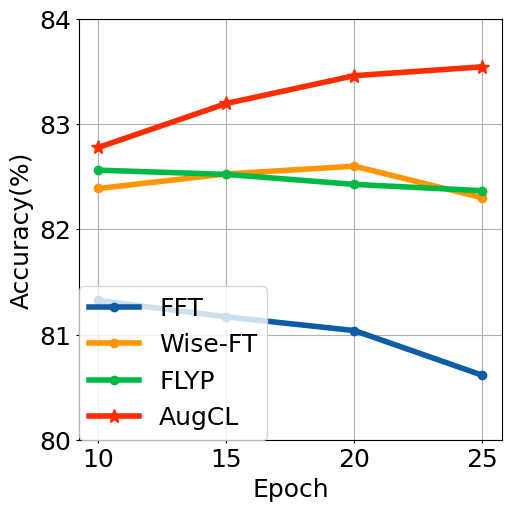

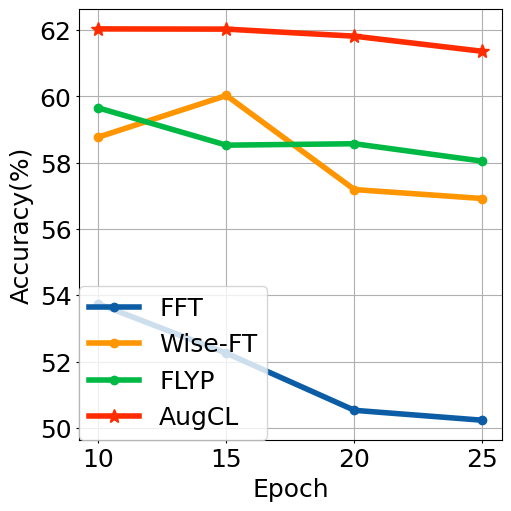

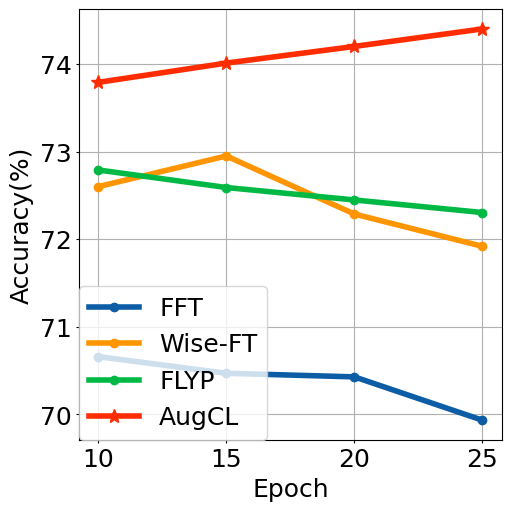

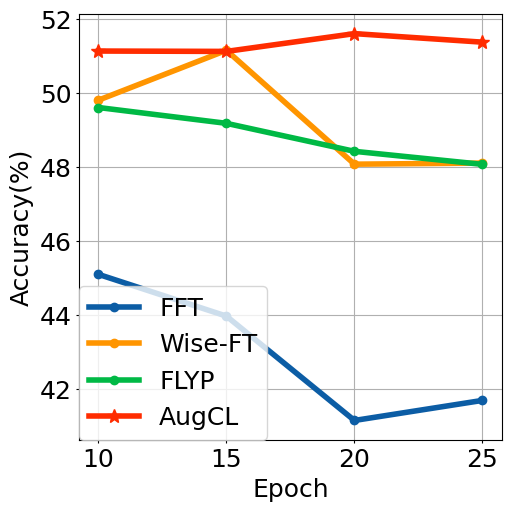

In [42]:
plt.rcParams.update({
    'font.size': 18,
    'lines.linewidth': 4,
})


def trend(v, t):
    coeff = np.polyfit(v, t, 1)  # 1=linear
    m = coeff[0]
    b = coeff[1]
    Vtrend = np.linspace(v[0], v[-1], 100)
    Ttrend = m * Vtrend + b
    return Vtrend, Ttrend


color = ['#FF2C00', '#0C5DA5', '#FF9500', '#00B945', '#845B97', '#474747', '#9e9e9e']
trend_linestyle = (0, (3, 2))
DS = [[FFT, WISE, FLYP, Our], [FFT_OOD, WISE_OOD, FLYP_OOD, Our_OOD], [FFT_V2, WISE_V2, FLYP_V2, Our_V2],
      [FFT_Ske, WISE_Ske, FLYP_Ske, Our_Ske]]
Name = ['ID', 'OOD', 'imageNet V2', 'imageNet Sketch']

for i, data in enumerate(DS):
    fig, axs = plt.subplots(figsize=(5, 5), layout='constrained')
    axs.plot(epoch, data[0], marker='o', label='FFT', color=color[1])  # Plot more data on the axes...
    axs.plot(epoch, data[1], marker='o', label='Wise-FT', color=color[2])  # Plot more data on the axes...
    axs.plot(epoch, data[2], marker='o', label='FLYP', color=color[3])  # Plot some data on the axes.
    axs.plot(epoch, data[3], marker='*', markersize=10, label='AugCL', color=color[0])  # Plot more data on the axes...

    # axs.plot(*trend(epoch, data[0]), linestyle=trend_linestyle, color=color[1], alpha=.5)
    # axs.plot(*trend(epoch, data[1]), linestyle=trend_linestyle, color=color[2], alpha=.5)
    # axs.plot(*trend(epoch, data[2]), linestyle=trend_linestyle, color=color[3], alpha=.5)
    # axs.plot(*trend(epoch, data[3]), linestyle=trend_linestyle, color=color[0], alpha=.5)

    if i == 0:
        axs.set_yticks([80, 81, 82, 83, 84])

    axs.set_xlabel('Epoch')  # Add an x-label to the axes.
    axs.set_ylabel('Accuracy(%)')  # Add a y-label to the axes.
    axs.set_xticks(epoch)
    # if (i + 1) % 2 == 0:
    #     axs.yaxis.set_label_position("right")
    #     axs.yaxis.tick_right()
    axs.legend(loc='lower left', borderaxespad=0.)

    # plt.show()
    plt.savefig(f'epochwise_{Name[i]}.pdf', dpi=2000)

ValueError: x and y must have same first dimension, but have shapes (15,) and (4,)

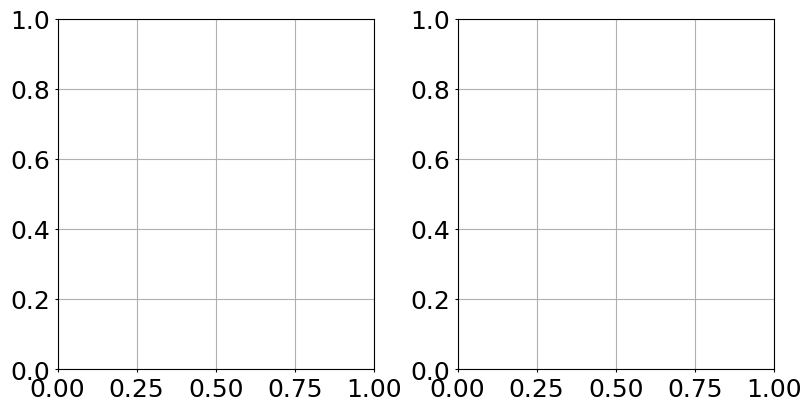

In [48]:
color = ['#FF2C00', '#0C5DA5', '#FF9500', '#00B945', '#845B97', '#474747', '#9e9e9e']
trend_linestyle = (0, (3, 2))

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='constrained')
axs[0].plot(epoch, FFT, marker='o', label='FFT', color=color[1])  # Plot more data on the axes...
axs[0].plot(epoch, WISE, marker='o', label='Wise-FT', color=color[2])  # Plot more data on the axes...
axs[0].plot(epoch, FLYP, marker='o', label='FLYP', color=color[3])  # Plot some data on the axes.
axs[0].plot(epoch, Our, marker='*', markersize=10, label='AugCL', color=color[0])  # Plot more data on the axes...

axs[0].plot(*trend(epoch, Our), linestyle=trend_linestyle, color=color[0], alpha=.5)
axs[0].plot(*trend(epoch, FFT), linestyle=trend_linestyle, color=color[1], alpha=.5)
axs[0].plot(*trend(epoch, WISE), linestyle=trend_linestyle, color=color[2], alpha=.5)
axs[0].plot(*trend(epoch, FLYP), linestyle=trend_linestyle, color=color[3], alpha=.5)

axs[0].set_xlabel('Epoch')  # Add an x-label to the axes.
axs[0].set_ylabel('Accuracy(%)')  # Add a y-label to the axes.

axs[0].set_xticks(epoch)
# axs[0].set_yticks([75, 76, 77, 78, 79])

axs[1].plot(epoch, Our_OOD, marker='*', markersize=10, label='AugCL')  # Plot more data on the axes...
axs[1].plot(epoch, FFT_OOD, marker='o', label='FFT')  # Plot more data on the axes...
axs[1].plot(epoch, WISE_OOD, marker='o', label='Wise-FT')  # Plot more data on the axes...
axs[1].plot(epoch, FLYP_OOD, marker='o', label='FLYP')  # Plot some data on the axes.

# axs[1].plot(*trend(epoch, Our_OOD), linestyle=trend_linestyle, color=color[0], alpha=.5)
# axs[1].plot(*trend(epoch, FFT_OOD), linestyle=trend_linestyle, color=color[1], alpha=.5)
# axs[1].plot(*trend(epoch, WISE_OOD), linestyle=trend_linestyle, color=color[2], alpha=.5)
# axs[1].plot(*trend(epoch, FLYP_OOD), linestyle=trend_linestyle, color=color[3], alpha=.5)

axs[1].set_xlabel('Epoch')  # Add an x-label to the axes.
axs[1].set_ylabel('Accuracy(%)')  # Add a y-label to the axes.

axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()

axs[1].set_xticks(epoch)
# axs[1].set_yticks([42, 44, 46, 48, 50, 52])

# plt.show()
# axs[0].legend(ncols=4, loc='upper center', borderaxespad=0., bbox_to_anchor=(.5, 1.09))
plt.savefig('epochwise.svg', dpi=2000)

## FS

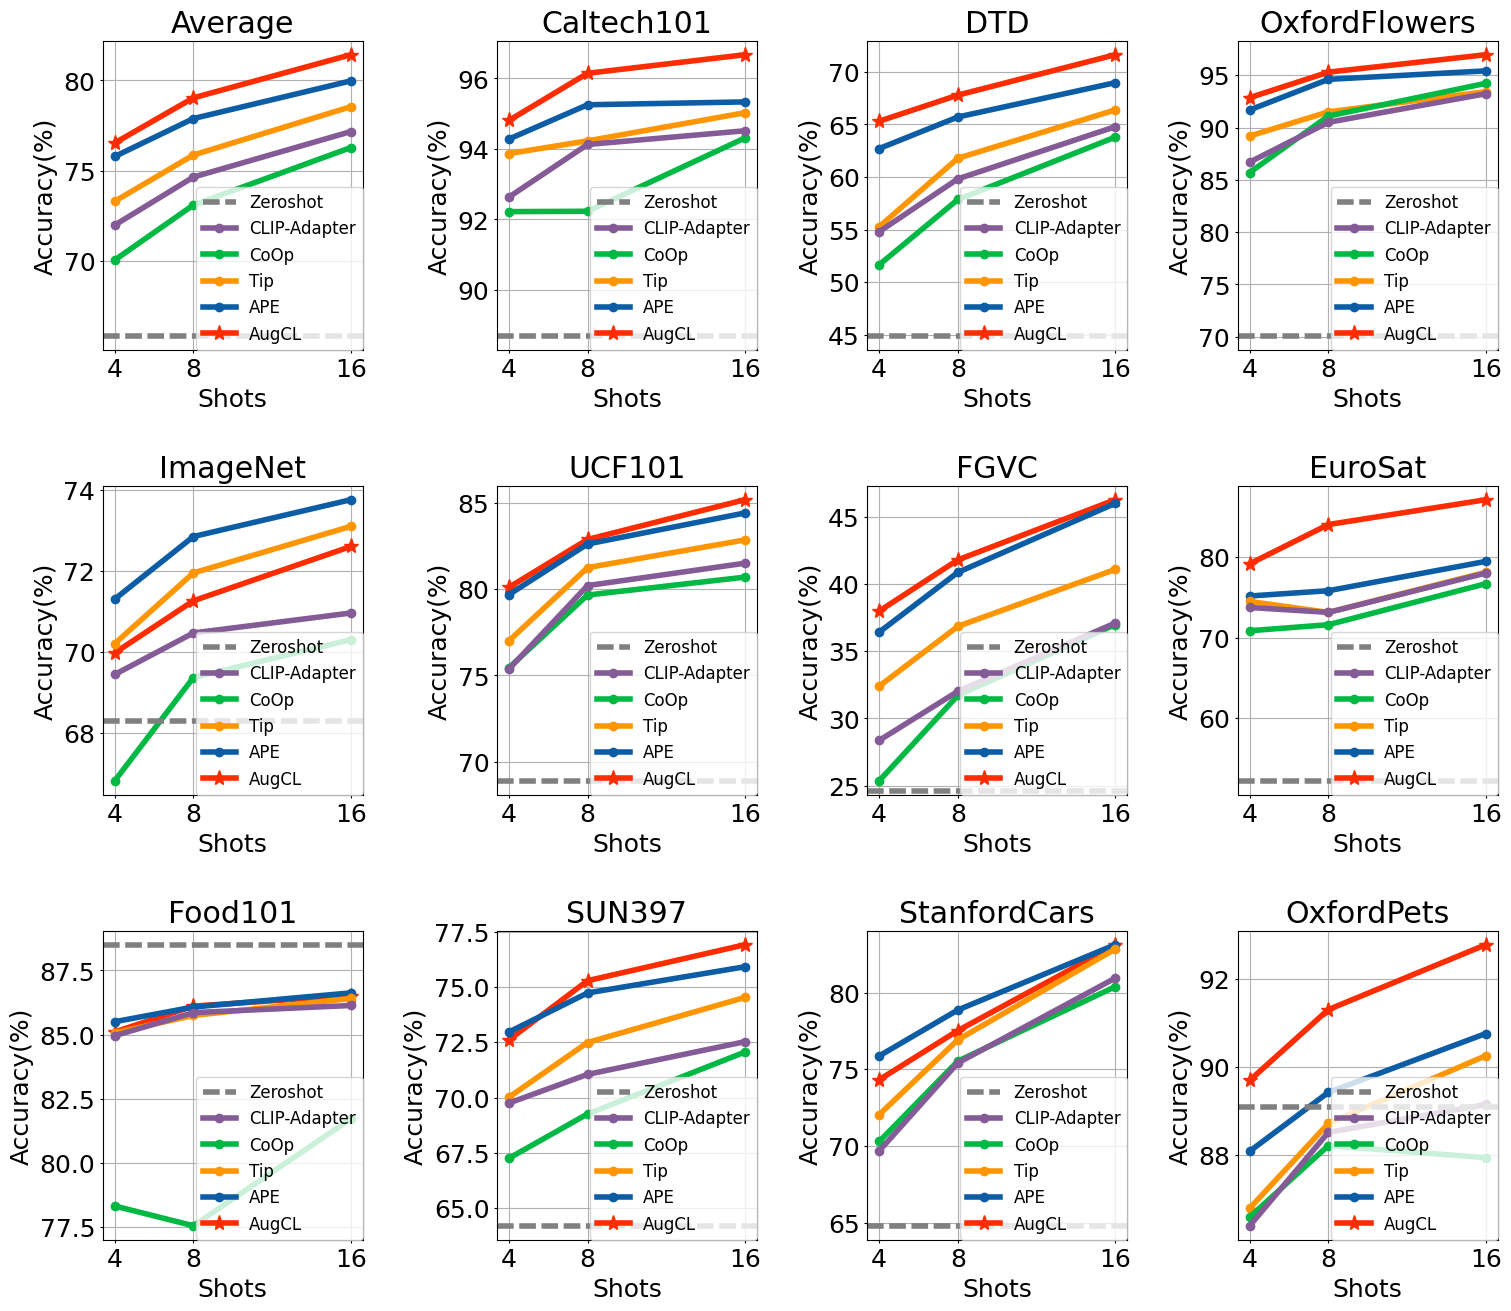

In [44]:
import pandas as pd

df = pd.read_csv('FS_result.csv')
for shot in [4, 8, 16]:
    average = df[df['Shots'] == shot].mean(numeric_only=True).to_frame().T
    average.insert(0, 'Dataset', 'Average', True)
    df = pd.concat([df, average])
    # m = df[df['Shots'] == shot].mean(numeric_only=True)
    # s = df[df['Shots'] == shot].std(numeric_only=True)
    # upper = (m + 2.58*s / math.sqrt(11)).to_frame().T
    # lower = (m - 2.58*s / math.sqrt(11)).to_frame().T
    # upper.insert(0, 'Dataset', 'Upper', True)
    # lower.insert(0, 'Dataset', 'Lower', True)
    # df = pd.concat([df, average, upper, lower])

SHOTS = [4, 8, 16]
MODELS = ['AugCL', 'APE', 'Tip', 'CoOp', 'CLIP-Adapter', 'Zeroshot']

DATASETS = ['Average', 'Caltech101', 'DTD', 'OxfordFlowers', 'ImageNet', 'UCF101', 'FGVC', 'EuroSat', 'Food101',
            'SUN397', 'StanfordCars', 'OxfordPets']

figs, axs = plt.subplots(3, 4, figsize=(15, 13), layout='constrained', gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

for i, dataset_name in enumerate(DATASETS):
    _df = df[df['Dataset'] == dataset_name]
    ax = axs[i // 4, i % 4]

    for model in MODELS[:-1]:
        marker = '*' if model == 'AugCL' else 'o'
        marker_size = 11 if model == 'AugCL' else 6
        ax.plot(SHOTS, _df[model], marker=marker, markersize=marker_size, label=model)
        # if dataset_name == 'Average' and model=='AugCL':
        #     ax.fill_between(SHOTS, df[df['Dataset'] == 'Lower'][model], df[df['Dataset'] =='Upper'][model], alpha=0.2)

    ax.axhline(y=_df['Zeroshot'].values[0], color='gray', linestyle=(0, (3, 1)), label='Zeroshot')

    ax.set_xlabel('Shots')  # Add an x-label to the axes.
    ax.set_ylabel('Accuracy(%)')  # Add a y-label to the axes.
    ax.set_xticks(SHOTS)
    ax.set_title(dataset_name)

    handles, labels = ax.get_legend_handles_labels()
    order = [5, 4, 3, 2, 1, 0]
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='lower right', borderaxespad=0.,
              fontsize=12)

# plt.show()
plt.savefig(f'fewshot.pdf', dpi=2000)


## Saturation

Index(['train_loss', 'eval_Best_loss', 'epoch', 'eval_loss', 'eval_acc'], dtype='object')


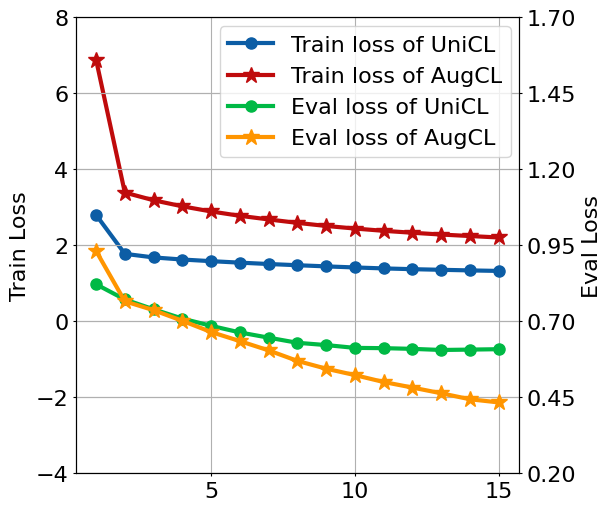

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

additional_params = {
    'font.size': 16,
    'lines.linewidth': 3,
    # 'axes.grid': True,
}
plt.rcParams.update(additional_params)


def trend(v, t):
    coeff = np.polyfit(v, t, 1)  # 1=linear
    m = coeff[0]
    b = coeff[1]
    Vtrend = np.linspace(v[0], v[-1], 20)
    Ttrend = m * Vtrend + b
    return Vtrend, Ttrend


# 'axes.prop_cycle': "cycler('color', ['#FF2C00', '#0C5DA5', '#FF9500','#00B945', '#845B97', '#474747', '#9e9e9e'])",

our = pd.read_csv('/home/seungmin/dmount/VLM/ARCHIVE_WEIGHTS/B16/B16_E15/summary.csv')
softce = pd.read_csv('/home/seungmin/dmount/VLM/ARCHIVE_WEIGHTS/B16/B16_E15_SoftCE/summary.csv')
print(our.keys())
epoch = our['epoch'].tolist()
fig, ax = plt.subplots(figsize=(6, 5), layout='constrained')

ax.plot(epoch, softce['train_loss'], marker='o', markersize=8, linestyle='-', label='Train loss of UniCL',
        color='#0C5DA5')
ax.plot(epoch, our['train_loss'], marker='*', markersize=12, linestyle='-', label='Train loss of AugCL',
        color='#BF0B0C')

ax2 = ax.twinx()
ax2.plot(epoch, softce['eval_loss'], marker='o', markersize=8, linestyle='-', label='Eval loss of UniCL',
         color='#00B945')
ax2.plot(epoch, our['eval_loss'], marker='*', markersize=12, linestyle='-', label='Eval loss of AugCL', color='#FF9500')

# ax.plot(*trend(epoch, our['train_loss'].tolist()), linestyle='--', alpha=0.7, color='#BF0B0C')
# ax.plot(*trend(epoch, softce['train_loss'].tolist()), linestyle='--', alpha=0.7, color='#0C5DA5')
# ax2.plot(*trend(epoch, our['eval_loss'].tolist()), linestyle='--', alpha=0.7, color='#FF9500')
# ax2.plot(*trend(epoch, softce['eval_loss'].tolist()), linestyle='--', alpha=0.7, color='#00B945')

ax.set_yticks([-4, -2, 0, 2, 4, 6, 8])
ax2.set_yticks([0.2, 0.45, 0.7, 0.95, 1.2, 1.45, 1.7])

ax.set_ylabel('Train Loss')
ax2.set_ylabel('Eval Loss')

fig.legend(bbox_to_anchor=(.86, 0.98))
# handles, labels = fig.gca().get_legend_handles_labels()
# order = [1,0,3,2]
# fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# fig.show()
fig.savefig('saturation.pdf', dpi=2000)

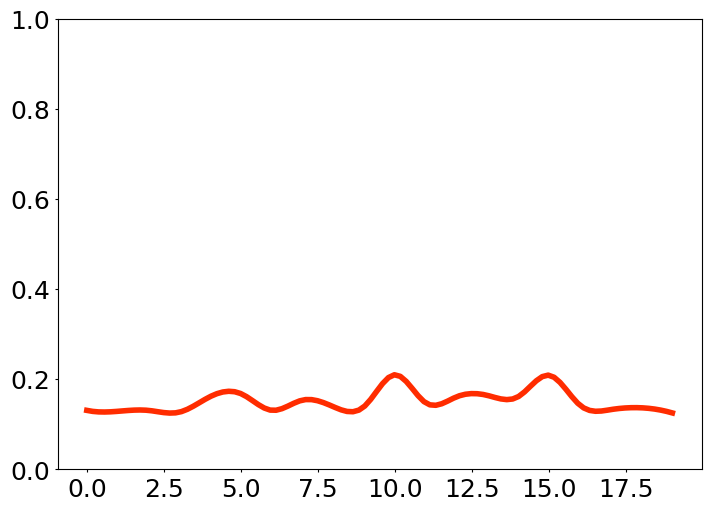

In [46]:
from matplotlib import pyplot as plt
import torch
from scipy.interpolate import make_interp_spline
import numpy as np

plt.rcParams.update({'font.size': 18})

x = np.array(range(20))
y = torch.rand(20, 1)
y[5] = 1.
y[10] = 1.48
y[15] = 1.47
y = torch.nn.functional.softmax(y, dim=0).numpy()

X_Y_Spline = make_interp_spline(x, y)

X = np.linspace(x.min(), x.max(), 100)
Y = X_Y_Spline(X) + 0.1

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X, Y)
ax.set_yticks([x * 0.1 for x in range(0, 11, 2)])
ax.set_xticks(np.arange(0, 20, 2.5))

plt.grid()
plt.savefig('tmp.svg', dpi=600)
plt.show()